In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:\Kaiburr/complaints.csv")

C:\Users\Anuj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-07-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Nelnet, Inc.",IL,61103,NaN,NaN,Web,2023-08-23,Closed with explanation,Yes,NaN,7284490
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,33444,NaN,NaN,Web,2023-08-25,Closed with non-monetary relief,Yes,NaN,7588176
2,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160
4,2023-08-23,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Information that should be on the report is mi...,NaN,NaN,LEXISNEXIS,FL,32258,NaN,Other,Web,2023-08-23,In progress,Yes,NaN,7442688


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101381 entries, 0 to 4101380
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 563.

In [5]:
print(df.describe())

       Complaint ID
count  4.101381e+06
mean   4.350486e+06
std    2.040780e+06
min    1.000000e+00
25%    2.883892e+06
50%    4.294108e+06
75%    6.186028e+06
max    7.593229e+06


In [6]:
print(df.isnull().sum())

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        716954
Consumer complaint narrative    2615783
Company public response         2200311
Company                               0
State                             43240
ZIP code                          30213
Tags                            3673906
Consumer consent provided?       903652
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3333023
Complaint ID                          0
dtype: int64


In [7]:
df = df.drop_duplicates()

In [8]:
df = df[["Product", "Sub-product", "Issue", "Sub-issue", "Consumer complaint narrative"]]

In [9]:
df = df.dropna(how="any")

In [10]:
df.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
10,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,Citibank allowed debit card transactions to ov...
12,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I submitted a letter to the XXXX Credit Bureau...
16,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,"Hi, I can't believe you guys are taking advant..."
19,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,"When I reviewed my credit report, I discovered..."
31,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Information is incorrect,"On XX/XX/, 2023, XXXX XXXX admitted liability ..."


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

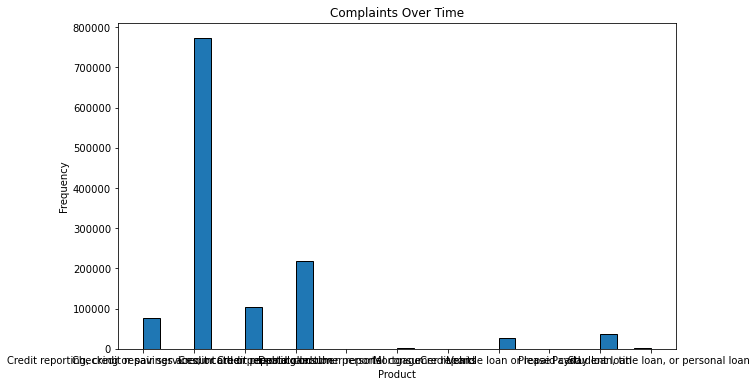

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Product'], bins=30, edgecolor='k')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Complaints Over Time')
plt.show()

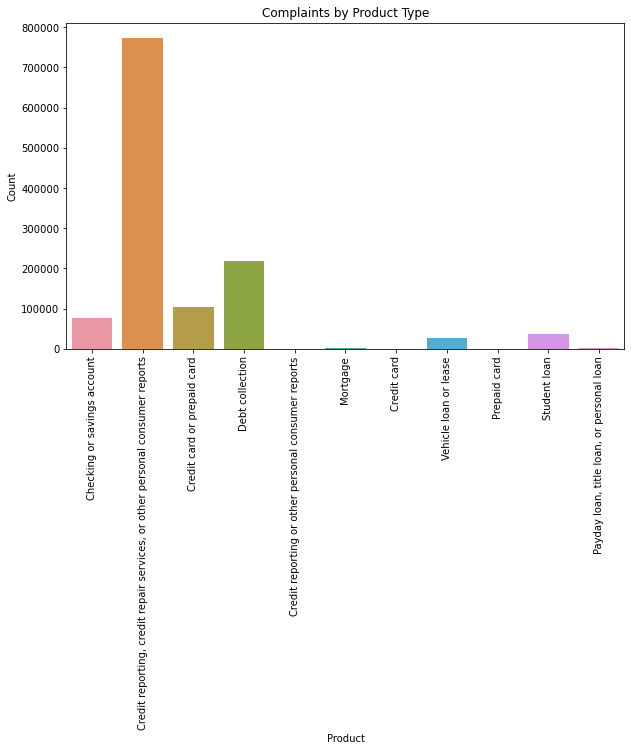

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', data=df)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Complaints by Product Type')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Sub-issue'>

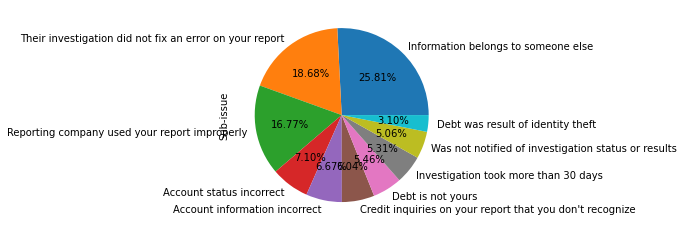

In [14]:
df["Sub-issue"].value_counts().head(10).plot(kind="pie", autopct="%.2f%%")

In [15]:
df['Complaint length'] = df['Consumer complaint narrative'].str.len()

In [16]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anuj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
stop_words_list = stopwords.words("english")

In [19]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub(r"<.*?>+", "", text)
    text = re.sub("\[.*?\]", "", text)
    text = re.sub("https?://S+|www.\.\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [word for word in words if not word in stop_words_list]
    words = [re.sub(r"(.)\1{1,}", r"\1\1", word) for word in words]
    words = [word.strip() for word in words if len(word.strip()) > 1]
    text = " ".join(words)
    return text

In [20]:
df["Consumer complaint narrative"] = df["Consumer complaint narrative"].apply(preprocess_text)

In [21]:
from sklearn.model_selection import train_test_split
X = df["Consumer complaint narrative"]
y = df["Product"]  

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_Data = cv.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_Data, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import SGDClassifier

s_dc = SGDClassifier()
s_dc.fit(X_train, y_train)

SGDClassifier()

In [25]:
s_dc.score(X_train, y_train)

0.8805091148998929

#  Selection of Multi Classification model

In [27]:
df2 = df.sample(10000, random_state=1).copy()

In [28]:
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()

In [29]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df2.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Complaint length,category_id
4006684,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,advised contact regarding items credit mine tr...,635,0
2194252,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,midland funding inc reaged debit still fells s...,285,1
3732850,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Money was taken from your account on the wrong...,encountered account xx xx xx xx sells designer...,930,2
2860305,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,unfortunately victim identity theft xx total u...,760,0
3610296,Vehicle loan or lease,Loan,Managing the loan or lease,Billing problem,car loan huntington bank filled paper work hun...,2012,3


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

features = tfidf.fit_transform(df2['Consumer complaint narrative']).toarray()

labels = df2.category_id

In [34]:
from sklearn.feature_selection import chi2

In [35]:
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Checking or savings account:
  * Most Correlated Unigrams are: branch, funds, bank
  * Most Correlated Bigrams are: debit card, wells fargo, checking account

==> Credit card:
  * Most Correlated Unigrams are: mom, airport, proves
  * Most Correlated Bigrams are: york xx, lost card, xx causing

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: rewards, citi, card
  * Most Correlated Bigrams are: card xx, american express, credit card

==> Credit reporting or other personal consumer reports:
  * Most Correlated Unigrams are: holders, sharing, liens
  * Most Correlated Bigrams are: dollars month, late month, reported data

==> Credit reporting, credit repair services, or other personal consumer reports:
  * Most Correlated Unigrams are: bank, debt, section
  * Most Correlated Bigrams are: reporting agency, section states, usc section

==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: trying collect, deb

In [36]:
X = df2['Consumer complaint narrative'] 
y = df2['Product']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 0)

In [37]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [38]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

C:\Users\Anuj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Anuj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Anuj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Anuj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Anuj\anaconda3\lib\site-packages\sklear

In [39]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [40]:
mean = cv_df.groupby('model_name').accuracy.mean()
standard = cv_df.groupby('model_name').accuracy.std()

accuracy = pd.concat([mean, standard], axis= 1, 
          ignore_index=True)
accuracy.columns = ['Mean Accuracy', 'Standard deviation']

In [41]:
accuracy

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.8618,0.005707
LogisticRegression,0.8537,0.007488
MultinomialNB,0.7757,0.007319
RandomForestClassifier,0.6120,0.000000


# Model Evaluation

In [42]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels, df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [47]:
print(y_pred)

[0 0 0 ... 1 1 0]


# Prediction

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2), stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [49]:
new_complaint = """I have been enrolled back at XXXX XXXX University in the XX/XX/XXXX. Recently, i have been harassed by \
Navient for the last month. I have faxed in paperwork providing them with everything they needed. And yet I am still getting \
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late. At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the XX/XX/XXXX."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Student loan']


In [52]:
df2[df2['Consumer complaint narrative'] == new_complaint]

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Complaint length,category_id


In [53]:
new_complaint_2 = """Equifax exposed my personal information without my consent, as part of their recent data breach. \
In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \
off stock before the announcement."""
print(model.predict(fitted_vectorizer.transform([new_complaint_2])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [54]:
df2[df2['Consumer complaint narrative'] == new_complaint_2]

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Complaint length,category_id
